# Lab-3

Name: Purusharth Malik

Registration No.: 2348542

## Implement various image enhancement techniques using built-in and user defined functions

In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Plotting RGB images
def plot_image(img, title, og_im = cv2.cvtColor(cv2.imread('images/bird.png'), cv2.COLOR_BGR2RGB)):    
    fig, ax = plt.subplots(1, 2)
    # Plotting the original image
    ax[0].imshow(og_im)
    ax[0].axis('off')
    
    # Plotting the new image
    ax[1].imshow(img)
    ax[1].axis('off')
    plt.title(title)
    plt.show()
    
# Plotting grayscale images
def plot_image_gray(img, title, og_im = cv2.cvtColor(cv2.imread('images/bird.png'), cv2.COLOR_BGR2GRAY)): 
    fig, ax = plt.subplots(1, 2)
    # Plotting the original image
    ax[0].imshow(255-og_im, cmap='binary')
    ax[0].axis('off')
    
    # Plotting the new image
    ax[1].imshow(255-img, cmap='binary')
    ax[1].axis('off')
    plt.title(title)
    plt.show()

### Image Negative

To convert an image to its negative image, we simply have to pass the image through a function that subtracts the current pixel value from the maximum possible pixel value i.e. 255 in case of RGB or grayscale images.

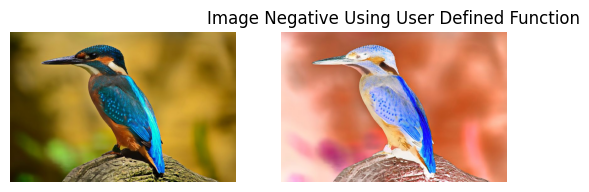

In [14]:
# Converting image to its negative
def negative(img, img_shape):
    func = lambda x: abs(255-x)
    func = np.vectorize(func)
    return func(img).reshape(img_shape)

# Driver code
im = cv2.imread('images/bird.png')
im_shape = im.shape
neg_im = negative(np.ndarray.flatten(im), im_shape)
plot_image(neg_im, 'Image Negative Using User Defined Function')

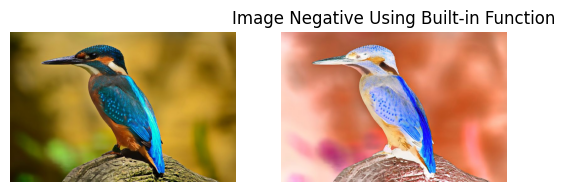

In [15]:
# Performing the same operation using built-in function
im = cv2.imread('images/bird.png')
neg_im = cv2.bitwise_not(im)
plot_image(neg_im, 'Image Negative Using Built-in Function')

### Gray Level Slicing

To perform gray level slicing, we will take an input range of the pixel values and set any pixel that has intensity lying in that range equal to 255.

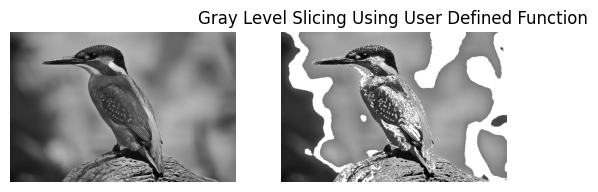

In [49]:
# Performing gray level slicing
def gray_level_slicing(img, start, end):
    func = lambda x: 255 if (x>=start and x<end+1) else x
    func = np.vectorize(func)
    return func(img)

# Driver code
im = cv2.imread('images/bird.png')
gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
sliced_img = gray_level_slicing(gray_im, 80, 120)
plot_image_gray(sliced_img, 'Gray Level Slicing Using User Defined Function')

### Histogram Equalization

The basic idea is that we want to distribute the intensity values more uniformly across all space of legitimate intensity values.

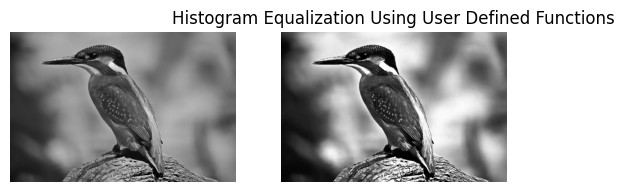

In [53]:
# Performing histogram equalization
def hist_equalization(img):
    vals, pdf = np.unique(img, return_counts=True)
    cdf = np.cumsum(pdf)
    min_cdf = min(cdf)
    new_vals = (np.round((cdf - min_cdf) / (img.size - min_cdf) * 255).astype(int))
    result = np.empty_like(img)
    for i, val in enumerate(vals):
        result[np.nonzero(img == val)] = new_vals[i]
    return result

# Driver code
im = cv2.imread('images/bird.png')
sliced_img = hist_equalization(gray_im)
plot_image_gray(sliced_img, 'Histogram Equalization Using User Defined Functions')

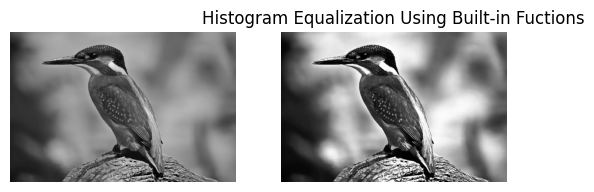

In [56]:
# Performing the same operations using built-in functions
im = cv2.imread('images/bird.png')
gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
equalized_im = cv2.equalizeHist(gray_im)
plot_image_gray(equalized_im, 'Histogram Equalization Using Built-in Fuctions')

# End